# University of Applied Sciences Munich
## Kalman Filter Tutorial

---
(c) Lukas Köstler (lkskstlr@gmail.com)

<h2 style="color:green">Instructions. Please Read.</h2>

+ Create a copy/clone of this Notebook and change the name slightly, i.e. Exercise1-Solution-YourName
+ Change the my_name variable in the cell below, s.t. your solution can be evaluated (done by the evaluation notebook)
+ When you execute the last cell your results will be saved as .csv files with specific naming and read by the evaluation Notebook
+ You can use different names, e.g. Lukas1, Lukas2, Lukas3, ... for different iterations of your solution

## Exercise 1 - Ball Flight

#### Task:
+ You are given data (height and velocity) of a ball that was shot straight into the air.
+ There are several things you have to do
 + In the "Kalman Step" cell implement the 1D Kalman Filter
 + Tune the parameters s.t. the output is optimal
 + Set the initial Conditions
 + Always visualize the result
+ If you like a solution just execute the last cell and submit it. A score (MSE + Log Likelihood) will be displayed by evaluation script
+ <span style="color:red">Do not open the -Physics or -Evaluation Scripts yourself. They contain the solution</span>

In [1]:
my_name = "LukasKoestler2" # Only Alphanumeric characters

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 3)

import re

import numpy as np
from scipy.integrate import quad
%matplotlib notebook

<IPython.core.display.Javascript object>


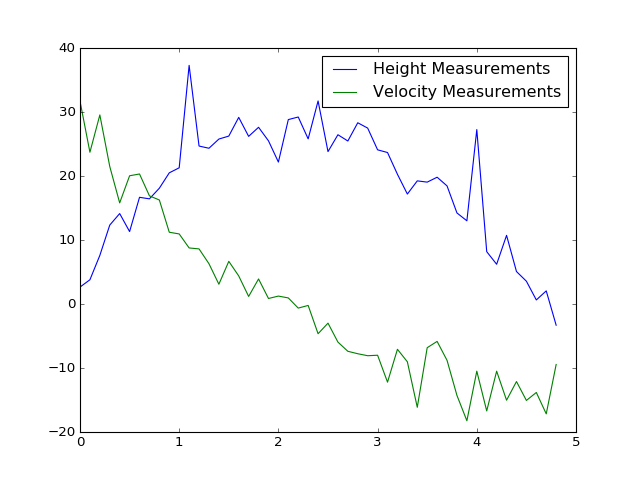

In [3]:
# Load Data
tt = np.genfromtxt('time.csv')
zz = np.genfromtxt('measurements.csv')
vv = np.genfromtxt('velocity.csv')

plt.figure()
plt.plot(tt, zz, label="Height Measurements")
plt.plot(tt, vv, label="Velocity Measurements")
plt.legend()
plt.show()

In [4]:
### Big Kalman Filter Function
def kalman_step(mu_n, sigma_n, z_np1, velocity_np1):
    # mu_n: mean of the last timestep
    # sigma_n: standard deviation of the last timestep
    # z_np1: measurement of this timestep
    # velocity_np1: velocity of this timesteps
    #
    # output:
    # mu_np1_np1: posterior mean for this timestep
    # sigma_np1_np1: posterior standard deviation for this timestep
    
    #####################################
    ### Implement your solution here ###
    #####################################
    
    ### Not a Kalman Filter, just a dummy
    mu_np1_np1 = 0.5*(z_np1+mu_n)
    sigma_np1_np1 = 1.5
    
    
    return mu_np1_np1, sigma_np1_np1

In [5]:
## Total Filter Run
mus = np.zeros_like(zz)
sigmas = np.zeros_like(zz)

###############################
### Initial Conditions here ###
###############################
mus[0] = 0.0
sigmas[0] = 1.0

for i in range(1, len(zz)):
    mu_np1_np1, sigma_np1_np1 = kalman_step(
        mus[i-1],
        sigmas[i-1],
        zz[i],
        vv[i-1])
    
    mus[i] = mu_np1_np1
    sigmas[i] = sigma_np1_np1

<IPython.core.display.Javascript object>


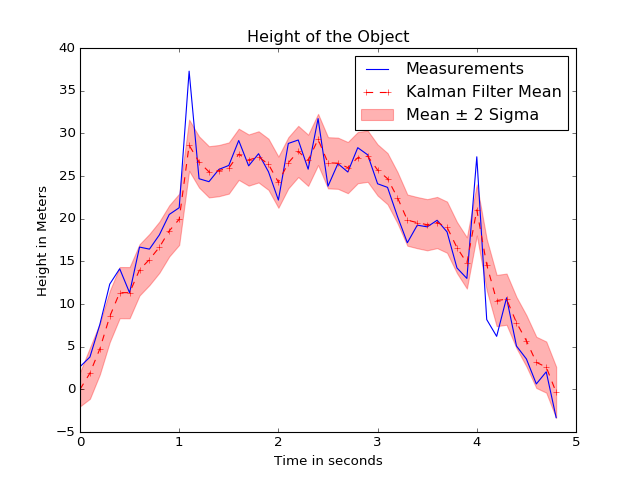

In [6]:
plt.figure()
plt.plot(tt, zz, label="Measurements")
plt.plot(tt, mus, 'r--+', label="Kalman Filter Mean")
plt.fill_between(tt, mus-2*sigmas, mus+2*sigmas,  alpha=0.3, color='r', label="Mean ± 2 Sigma")

plt.legend()
plt.title("Height of the Object")
plt.ylabel("Height in Meters")
plt.xlabel("Time in seconds")


In [7]:
#############################
##### SAVE YOUR RESULTS #####
#############################
stripped_name = re.sub(r'\W+', '', my_name)

np.savetxt(stripped_name+'_mus.csv', mus)
np.savetxt(stripped_name+'_sigmas.csv', sigmas)